# MSc. DA  - CA2

JOANNE O'SHAUGHNESSY, sba22202 <br>

# Section 1: Loading of Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
%matplotlib inline
import seaborn as sns
sns.set()

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout
%matplotlib inline

# Section 2: Dairy DataSets - Data Prep

Loading/reading CSV file with Milk Sales Ireland in litres Jan 1980 - Dec 2010 (source = gov.ie)

In [2]:
df = pd.read_csv('AKM02.20230103212036.csv')

In [3]:
df.shape

(2520, 8)

In [4]:
df.head()

,STATISTIC,STATISTIC Label,TLIST(M1),Date,C02064V02491,Type of Milk,UNIT,VALUE
0,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,1,All Milk,Million Litres,38.2
1,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,12,Whole Milk,Million Litres,38.2
2,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,13,Skimmed and Semi-skimmed milk,Million Litres,NaN
3,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,14,Skimmed Milk,Million Litres,NaN
4,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,15,Semi-skimmed milk,Million Litres,NaN


In [5]:
df.tail()

,STATISTIC,STATISTIC Label,TLIST(M1),Date,C02064V02491,Type of Milk,UNIT,VALUE
2515,AKM02,Milk Sales (Dairy) for Human Consumption,202112,01/12/2021,1,All Milk,Million Litres,39.7
2516,AKM02,Milk Sales (Dairy) for Human Consumption,202112,01/12/2021,12,Whole Milk,Million Litres,24.5
2517,AKM02,Milk Sales (Dairy) for Human Consumption,202112,01/12/2021,13,Skimmed and Semi-skimmed milk,Million Litres,15.2
2518,AKM02,Milk Sales (Dairy) for Human Consumption,202112,01/12/2021,14,Skimmed Milk,Million Litres,NaN
2519,AKM02,Milk Sales (Dairy) for Human Consumption,202112,01/12/2021,15,Semi-skimmed milk,Million Litres,NaN


In [6]:
df['Type of Milk'].unique()

array(['All Milk', 'Whole Milk', 'Skimmed and Semi-skimmed milk',
       'Skimmed Milk', 'Semi-skimmed milk'], dtype=object)

In [7]:
df.drop(df[df['C02064V02491'] != 1].index, inplace = True)

In [8]:
df.head()

,STATISTIC,STATISTIC Label,TLIST(M1),Date,C02064V02491,Type of Milk,UNIT,VALUE
0,AKM02,Milk Sales (Dairy) for Human Consumption,198001,01/01/1980,1,All Milk,Million Litres,38.2
5,AKM02,Milk Sales (Dairy) for Human Consumption,198002,01/02/1980,1,All Milk,Million Litres,36.6
10,AKM02,Milk Sales (Dairy) for Human Consumption,198003,01/03/1980,1,All Milk,Million Litres,38.4
15,AKM02,Milk Sales (Dairy) for Human Consumption,198004,01/04/1980,1,All Milk,Million Litres,36.8
20,AKM02,Milk Sales (Dairy) for Human Consumption,198005,01/05/1980,1,All Milk,Million Litres,38.8


We will focus on milk type all milk, this is the sum of all 4 milk types. The reason for this is there have been chnages since 1980 in type of milk the consumer prefers, for example, increase in preference for skimmed and semi skimmed milk with heightened consumer awareness of fat content and milk companies advertising lower fat content milk. This product has a greater return.

In [9]:
df.shape

(504, 8)

In [10]:
df.isnull().values.any()

False

In [11]:
df.isnull().values.sum()

0

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 2515
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATISTIC        504 non-null    object        
 1   STATISTIC Label  504 non-null    object        
 2   TLIST(M1)        504 non-null    int64         
 3   Date             504 non-null    datetime64[ns]
 4   C02064V02491     504 non-null    int64         
 5   Type of Milk     504 non-null    object        
 6   UNIT             504 non-null    object        
 7   VALUE            504 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 35.4+ KB


In [14]:
df['STATISTIC Label'] = df['STATISTIC Label'].map(lambda x: str(x)[:-30])
print(df['STATISTIC Label'])

0       Milk Sales
5       Milk Sales
10      Milk Sales
15      Milk Sales
20      Milk Sales
           ...    
2495    Milk Sales
2500    Milk Sales
2505    Milk Sales
2510    Milk Sales
2515    Milk Sales
Name: STATISTIC Label, Length: 504, dtype: object


In [15]:
df.sort_values('VALUE')

,STATISTIC,STATISTIC Label,TLIST(M1),Date,C02064V02491,Type of Milk,UNIT,VALUE
2465,AKM02,Milk Sales,202102,2021-01-02,1,All Milk,Million Litres,36.3
65,AKM02,Milk Sales,198102,1981-01-02,1,All Milk,Million Litres,36.3
5,AKM02,Milk Sales,198002,1980-01-02,1,All Milk,Million Litres,36.6
2045,AKM02,Milk Sales,201402,2014-01-02,1,All Milk,Million Litres,36.6
50,AKM02,Milk Sales,198011,1980-01-11,1,All Milk,Million Litres,36.8
...,...,...,...,...,...,...,...,...
2430,AKM02,Milk Sales,202007,2020-01-07,1,All Milk,Million Litres,47.4
1115,AKM02,Milk Sales,199808,1998-01-08,1,All Milk,Million Litres,47.5
2245,AKM02,Milk Sales,201706,2017-01-06,1,All Milk,Million Litres,47.5
995,AKM02,Milk Sales,199608,1996-01-08,1,All Milk,Million Litres,47.6


In [16]:
df.shape

(504, 8)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 2515
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATISTIC        504 non-null    object        
 1   STATISTIC Label  504 non-null    object        
 2   TLIST(M1)        504 non-null    int64         
 3   Date             504 non-null    datetime64[ns]
 4   C02064V02491     504 non-null    int64         
 5   Type of Milk     504 non-null    object        
 6   UNIT             504 non-null    object        
 7   VALUE            504 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 35.4+ KB


In [18]:
 df = df.rename(columns={"VALUE":"million_litres"})

In [19]:
df.drop(['STATISTIC', 'C02064V02491', 'UNIT', 'TLIST(M1)'], axis =1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 2515
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATISTIC Label  504 non-null    object        
 1   Date             504 non-null    datetime64[ns]
 2   Type of Milk     504 non-null    object        
 3   million_litres   504 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 19.7+ KB


In [20]:
df.drop(['STATISTIC Label', 'Type of Milk'], axis =1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 2515
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            504 non-null    datetime64[ns]
 1   million_litres  504 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 11.8+ KB


In [21]:
df.shape

(504, 2)

In [22]:
df['million_litres'] = df['million_litres'].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 2515
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            504 non-null    datetime64[ns]
 1   million_litres  504 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


In [24]:
df

,Date,million_litres
0,1980-01-01,38.2
5,1980-01-02,36.6
10,1980-01-03,38.4
15,1980-01-04,36.8
20,1980-01-05,38.8
...,...,...
2495,2021-01-08,44.8
2500,2021-01-09,41.7
2505,2021-01-10,41.8
2510,2021-01-11,40.1


In [25]:
#We set the Date as index

df.set_index('Date', inplace=True)

In [26]:
df.head()

,million_litres
Date,
1980-01-01,38.2
1980-01-02,36.6
1980-01-03,38.4
1980-01-04,36.8
1980-01-05,38.8


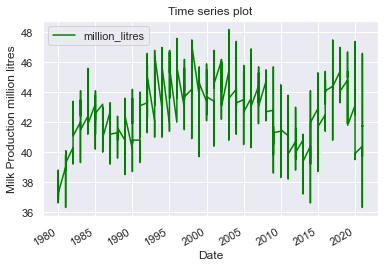

In [27]:
#Time series plot

df.plot(color = 'green')
plt.ylabel('Milk Production million litres')
plt.title('Time series plot')
plt.show()

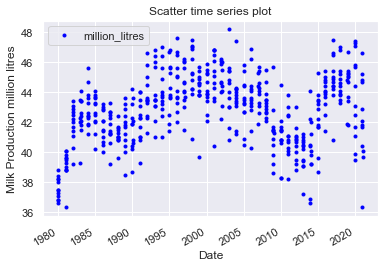

In [28]:
df.plot(style = '.', color = 'blue')
plt.ylabel('Milk Production million litres')
plt.title('Scatter time series plot')
plt.savefig('Scatter.jpg')



In [29]:
groups = df.groupby(pd.Grouper(freq = 'A'))

In [30]:
groups

In [31]:
keys = groups.groups.keys()

In [32]:
keys

dict_keys([Timestamp('1980-12-31 00:00:00', freq='A-DEC'), Timestamp('1981-12-31 00:00:00', freq='A-DEC'), Timestamp('1982-12-31 00:00:00', freq='A-DEC'), Timestamp('1983-12-31 00:00:00', freq='A-DEC'), Timestamp('1984-12-31 00:00:00', freq='A-DEC'), Timestamp('1985-12-31 00:00:00', freq='A-DEC'), Timestamp('1986-12-31 00:00:00', freq='A-DEC'), Timestamp('1987-12-31 00:00:00', freq='A-DEC'), Timestamp('1988-12-31 00:00:00', freq='A-DEC'), Timestamp('1989-12-31 00:00:00', freq='A-DEC'), Timestamp('1990-12-31 00:00:00', freq='A-DEC'), Timestamp('1991-12-31 00:00:00', freq='A-DEC'), Timestamp('1992-12-31 00:00:00', freq='A-DEC'), Timestamp('1993-12-31 00:00:00', freq='A-DEC'), Timestamp('1994-12-31 00:00:00', freq='A-DEC'), Timestamp('1995-12-31 00:00:00', freq='A-DEC'), Timestamp('1996-12-31 00:00:00', freq='A-DEC'), Timestamp('1997-12-31 00:00:00', freq='A-DEC'), Timestamp('1998-12-31 00:00:00', freq='A-DEC'), Timestamp('1999-12-31 00:00:00', freq='A-DEC'), Timestamp('2000-12-31 00:00:0

In [33]:
groups.get_group('1980-12-31')

,million_litres
Date,
1980-01-01,38.2
1980-01-02,36.6
1980-01-03,38.4
1980-01-04,36.8
1980-01-05,38.8
1980-01-06,37.5
1980-01-07,38.0
1980-01-08,38.2
1980-01-09,37.1


In [34]:
for key in keys:
    print(key)

1980-12-31 00:00:00
1981-12-31 00:00:00
1982-12-31 00:00:00
1983-12-31 00:00:00
1984-12-31 00:00:00
1985-12-31 00:00:00
1986-12-31 00:00:00
1987-12-31 00:00:00
1988-12-31 00:00:00
1989-12-31 00:00:00
1990-12-31 00:00:00
1991-12-31 00:00:00
1992-12-31 00:00:00
1993-12-31 00:00:00
1994-12-31 00:00:00
1995-12-31 00:00:00
1996-12-31 00:00:00
1997-12-31 00:00:00
1998-12-31 00:00:00
1999-12-31 00:00:00
2000-12-31 00:00:00
2001-12-31 00:00:00
2002-12-31 00:00:00
2003-12-31 00:00:00
2004-12-31 00:00:00
2005-12-31 00:00:00
2006-12-31 00:00:00
2007-12-31 00:00:00
2008-12-31 00:00:00
2009-12-31 00:00:00
2010-12-31 00:00:00
2011-12-31 00:00:00
2012-12-31 00:00:00
2013-12-31 00:00:00
2014-12-31 00:00:00
2015-12-31 00:00:00
2016-12-31 00:00:00
2017-12-31 00:00:00
2018-12-31 00:00:00
2019-12-31 00:00:00
2020-12-31 00:00:00
2021-12-31 00:00:00


In [35]:
key

Timestamp('2021-12-31 00:00:00', freq='A-DEC')

In [36]:
groups.get_group(key)['million_litres'].values

array([40.4, 36.3, 42.1, 42.9, 46.6, 44.7, 45.2, 44.8, 41.7, 41.8, 40.1,
       39.7])

In [37]:
years = pd.DataFrame()
for key in keys:
    years[key] = groups.get_group(key)['million_litres'].values

In [38]:
years

,1980-12-31,1981-12-31,1982-12-31,1983-12-31,1984-12-31,1985-12-31,1986-12-31,1987-12-31,1988-12-31,1989-12-31,...,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31
0,38.2,39.0,40.3,42.0,42.4,43.2,43.2,42.7,41.3,40.8,...,40.7,40.8,40.4,42.9,42.5,44.4,45.4,44.8,43.1,40.4
1,36.6,36.3,39.2,39.3,41.2,40.2,40.0,39.2,39.6,38.5,...,38.8,37.2,36.6,38.7,41.4,40.8,43.3,41.9,42.5,36.3
2,38.4,39.8,43.4,43.5,45.6,43.6,42.8,43.3,42.4,43.2,...,43.0,41.2,44.1,45.3,43.9,46.5,46.8,46.7,45.8,42.1
3,36.8,39.6,42.5,42.3,41.8,42.0,42.1,41.3,40.8,40.4,...,39.2,40.2,36.9,39.6,43.7,43.8,44.4,45.2,47.1,42.9
4,38.8,39.5,43.1,43.4,44.7,43.8,42.9,42.5,41.7,41.8,...,41.1,41.0,42.2,43.8,45.4,46.6,47.0,45.3,47.3,46.6
5,37.5,38.8,41.4,42.4,42.6,42.1,40.5,41.2,40.8,42.9,...,40.8,39.1,40.5,41.7,43.2,47.5,43.9,45.0,45.7,44.7
6,38.0,40.1,42.7,44.1,43.3,43.7,42.1,42.7,41.0,41.7,...,40.4,39.5,39.8,43.2,44.7,44.9,43.5,44.7,47.4,45.2
7,38.2,40.1,41.7,43.4,43.6,43.3,41.4,41.9,40.9,42.0,...,41.6,40.7,39.2,43.5,45.0,45.4,44.9,45.1,44.4,44.8
8,37.1,39.6,42.2,42.1,42.3,41.2,41.5,41.4,41.5,43.6,...,39.5,39.1,39.2,42.2,44.4,44.7,43.8,43.4,41.7,41.7
9,37.5,38.8,42.9,42.6,43.8,44.1,43.0,42.3,41.0,41.2,...,41.0,40.4,40.1,43.4,44.8,45.0,45.2,45.4,41.1,41.8


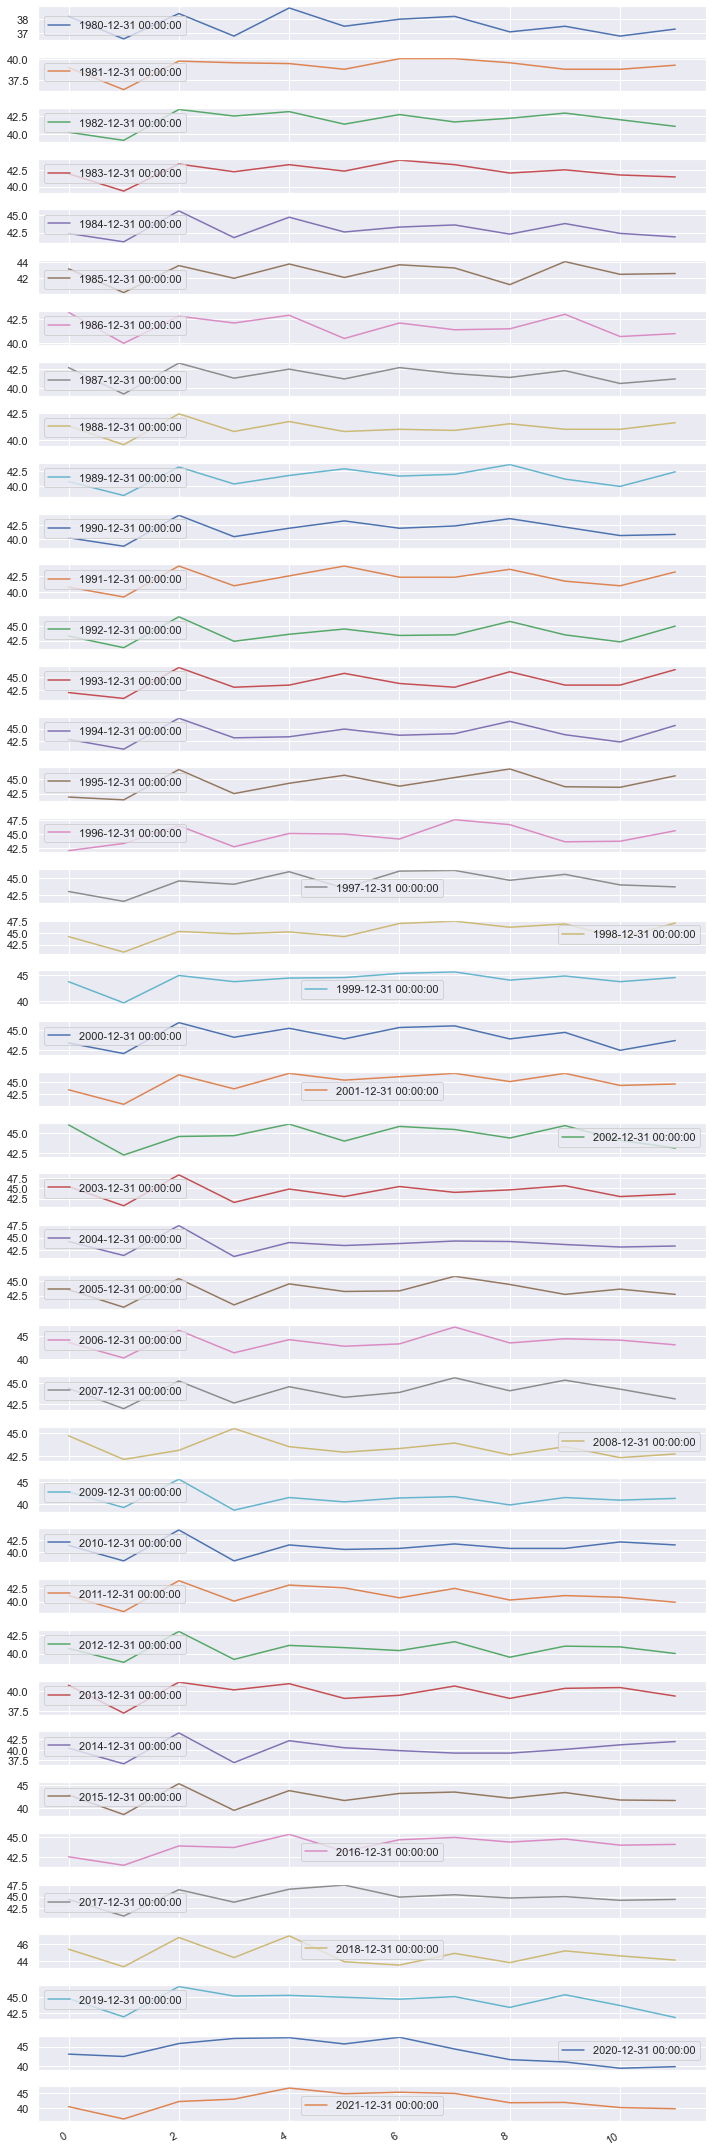

In [39]:
years.plot(subplots = True, figsize = (10, 30))
plt.savefig('Series.pdf')
plt.tight_layout()


# Manufacture Milk Price Ireland, NZ, Netherlands

In [40]:
fao = pd.read_csv('FAOSTAT_data_en_1-4-2023 (1).csv')

In [41]:
fao.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,372,Ireland,5530,Producer Price (LCU/tonne),2211,Raw milk of cattle,1991,1991,7021,Annual value,LCU,184.0,A,Official figure
1,PP,Producer Prices,372,Ireland,5530,Producer Price (LCU/tonne),2211,Raw milk of cattle,1992,1992,7021,Annual value,LCU,199.0,A,Official figure
2,PP,Producer Prices,372,Ireland,5530,Producer Price (LCU/tonne),2211,Raw milk of cattle,1993,1993,7021,Annual value,LCU,214.0,A,Official figure
3,PP,Producer Prices,372,Ireland,5530,Producer Price (LCU/tonne),2211,Raw milk of cattle,1994,1994,7021,Annual value,LCU,213.0,A,Official figure
4,PP,Producer Prices,372,Ireland,5530,Producer Price (LCU/tonne),2211,Raw milk of cattle,1995,1995,7021,Annual value,LCU,226.0,A,Official figure


In [42]:
fao.tail()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
490,PP,Producer Prices,554,New Zealand,5539,Producer Price Index (2014-2016 = 100),2211,Raw milk of cattle,2017,2017,7021,Annual value,NaN,110.64,I,Imputed value
491,PP,Producer Prices,554,New Zealand,5539,Producer Price Index (2014-2016 = 100),2211,Raw milk of cattle,2018,2018,7021,Annual value,NaN,120.71,I,Imputed value
492,PP,Producer Prices,554,New Zealand,5539,Producer Price Index (2014-2016 = 100),2211,Raw milk of cattle,2019,2019,7021,Annual value,NaN,114.42,I,Imputed value
493,PP,Producer Prices,554,New Zealand,5539,Producer Price Index (2014-2016 = 100),2211,Raw milk of cattle,2020,2020,7021,Annual value,NaN,123.44,I,Imputed value
494,PP,Producer Prices,554,New Zealand,5539,Producer Price Index (2014-2016 = 100),2211,Raw milk of cattle,2021,2021,7021,Annual value,NaN,132.47,I,Imputed value


In [43]:
fao.shape

(495, 16)

In [44]:
fao.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year',
       'Months Code', 'Months', 'Unit', 'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [45]:
fao.dtypes

Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Item Code (CPC)       int64
Item                 object
Year Code             int64
Year                  int64
Months Code           int64
Months               object
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

In [46]:
fao.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Months Code,Value
count,495.000000,495.000000,495.0,495.000000,495.000000,495.000000,495.000000
mean,496.222222,5532.236364,2211.0,2008.127273,2008.127273,7017.133333,298.613818
std,71.516080,3.338933,0.0,8.713499,8.713499,6.662056,137.052937
min,372.000000,5530.000000,2211.0,1991.000000,1991.000000,7001.000000,41.150000
25%,528.000000,5530.000000,2211.0,2001.000000,2001.000000,7012.000000,232.800000
50%,528.000000,5531.000000,2211.0,2010.000000,2010.000000,7021.000000,314.000000
75%,528.000000,5532.000000,2211.0,2015.000000,2015.000000,7021.000000,355.000000
max,554.000000,5539.000000,2211.0,2021.000000,2021.000000,7021.000000,761.000000


In [47]:
fao['Element'].unique()

array(['Producer Price (LCU/tonne)', 'Producer Price (SLC/tonne)',
       'Producer Price (USD/tonne)',
       'Producer Price Index (2014-2016 = 100)'], dtype=object)

Lets keep Producer price in USD/tonne and remove the other options from the dataframe

In [48]:
fao = fao[fao.Element == 'Producer Price (USD/tonne)']

In [49]:
fao.head(2)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
60,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1991,1991,7021,Annual value,USD,296.1,A,Official figure
61,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1992,1992,7021,Annual value,USD,338.6,A,Official figure


In [50]:
fao.reset_index(drop=True)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1991,1991,7021,Annual value,USD,296.1,A,Official figure
1,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1992,1992,7021,Annual value,USD,338.6,A,Official figure
2,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1993,1993,7021,Annual value,USD,316.0,A,Official figure
3,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1994,1994,7021,Annual value,USD,318.6,A,Official figure
4,PP,Producer Prices,372,Ireland,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,1995,1995,7021,Annual value,USD,362.3,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,PP,Producer Prices,554,New Zealand,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,2016,2016,7021,Annual value,USD,244.3,A,Official figure
86,PP,Producer Prices,554,New Zealand,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,2017,2017,7021,Annual value,USD,374.4,A,Official figure
87,PP,Producer Prices,554,New Zealand,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,2018,2018,7021,Annual value,USD,397.9,A,Official figure
88,PP,Producer Prices,554,New Zealand,5532,Producer Price (USD/tonne),2211,Raw milk of cattle,2019,2019,7021,Annual value,USD,359.1,A,Official figure


In [51]:
fao.shape

(90, 16)

In [52]:
fao.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Element', 'Item Code (CPC)', 'Year Code', 'Months Code', 'Months', 'Unit', 'Flag', 'Flag Description'], axis =1, inplace=True)
fao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 60 to 463
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    90 non-null     object 
 1   Item    90 non-null     object 
 2   Year    90 non-null     int64  
 3   Value   90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ KB


# Manufacture Milk Price Ireland

Loading/reading CSV file with Manufacturing Milk Prices in Ireland in Euro Jan 1976 - Dec 2010 (source = gov.ie). <br> This dataset also includes egg manufacturing prices, which we will remove from the dataframe before EDA as we are interested in milk price only.

In [53]:
df1 = pd.read_csv('AJM06.20230103213315.csv')

In [54]:
df1.shape

(1260, 8)

This dataset has 1260 rows and 8 columns as shoen using the .shape function. Next we will use the .head and .tail function to take a look at the data in more detail.

In [55]:
df1.head(2)

,STATISTIC,Statistic Label,C02136V02577,Product,TLIST(M1),Date,UNIT,VALUE
0,AJM06,Manufacturing Milk and Hen Egg Prices (includi...,1,"Milk (per litre), actual fat and protein",197601,01/01/1976,Euro,0.099
1,AJM06,Manufacturing Milk and Hen Egg Prices (includi...,1,"Milk (per litre), actual fat and protein",197602,01/02/1976,Euro,0.097


In [56]:
df1.tail(1)

,STATISTIC,Statistic Label,C02136V02577,Product,TLIST(M1),Date,UNIT,VALUE
1259,AJM06,Manufacturing Milk and Hen Egg Prices (includi...,3,Hens eggs (10 dozen),201012,01/12/2010,Euro,7.25


In [57]:
df1.sample(2)

,STATISTIC,Statistic Label,C02136V02577,Product,TLIST(M1),Date,UNIT,VALUE
230,AJM06,Manufacturing Milk and Hen Egg Prices (includi...,1,"Milk (per litre), actual fat and protein",199503,01/03/1995,Euro,0.269
987,AJM06,Manufacturing Milk and Hen Egg Prices (includi...,3,Hens eggs (10 dozen),198804,01/04/1988,Euro,5.680


Above, we  have the first and last 5 rows, as per default of .head and .tail. We also have called a random sample of 10 rows. There is no missing data in the examples abpve, however we will need to confirm this later. We can remove the statistic column. We will also edit the statistic label, removing the reference to egg prices as we are not analysing this data. We can remove the rows with egg prices also. We will also need to transfor the date uisng date time function. There are two types of products we will keep, milk actual fat and standardised, which is milk that has been treated with lactose or retentate to achieve a fixed content for further processing, e.g for skimmed milk powder. it may also include centrifugation to remove fat.

In [58]:
 df1 = df1.rename(columns={"VALUE":"Value_euro"})

In [59]:
for col in df1.columns:
    print(col)

STATISTIC
Statistic Label
C02136V02577
Product
TLIST(M1)
Date
UNIT
Value_euro


We will extend the column width to take a full look at the data in Statistic Label column.

In [60]:
pd.options.display.max_colwidth = 100
print(df1['Statistic Label'])

0       Manufacturing Milk and Hen Egg Prices (including VAT)
1       Manufacturing Milk and Hen Egg Prices (including VAT)
2       Manufacturing Milk and Hen Egg Prices (including VAT)
3       Manufacturing Milk and Hen Egg Prices (including VAT)
4       Manufacturing Milk and Hen Egg Prices (including VAT)
                                ...                          
1255    Manufacturing Milk and Hen Egg Prices (including VAT)
1256    Manufacturing Milk and Hen Egg Prices (including VAT)
1257    Manufacturing Milk and Hen Egg Prices (including VAT)
1258    Manufacturing Milk and Hen Egg Prices (including VAT)
1259    Manufacturing Milk and Hen Egg Prices (including VAT)
Name: Statistic Label, Length: 1260, dtype: object


In [61]:
df1['Statistic Label'].unique()

array(['Manufacturing Milk and Hen Egg Prices (including VAT)'],
      dtype=object)

Next we will replace the data in 

In [62]:
df1=df1.replace('Manufacturing Milk and Hen Egg Prices (including VAT)', 'Manufacturing Milk Price')
print(df1['Statistic Label'])

0       Manufacturing Milk Price
1       Manufacturing Milk Price
2       Manufacturing Milk Price
3       Manufacturing Milk Price
4       Manufacturing Milk Price
                  ...           
1255    Manufacturing Milk Price
1256    Manufacturing Milk Price
1257    Manufacturing Milk Price
1258    Manufacturing Milk Price
1259    Manufacturing Milk Price
Name: Statistic Label, Length: 1260, dtype: object


In [63]:
df1 = df1[df1.C02136V02577 != 3]

In [64]:
df1.shape

(840, 8)

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        840 non-null    object 
 1   Statistic Label  840 non-null    object 
 2   C02136V02577     840 non-null    int64  
 3   Product          840 non-null    object 
 4   TLIST(M1)        840 non-null    int64  
 5   Date             840 non-null    object 
 6   UNIT             840 non-null    object 
 7   Value_euro       840 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 59.1+ KB


In [66]:
df1['Date'] = pd.to_datetime(df1['Date'], format="%d/%m/%Y")
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATISTIC        840 non-null    object        
 1   Statistic Label  840 non-null    object        
 2   C02136V02577     840 non-null    int64         
 3   Product          840 non-null    object        
 4   TLIST(M1)        840 non-null    int64         
 5   Date             840 non-null    datetime64[ns]
 6   UNIT             840 non-null    object        
 7   Value_euro       840 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 59.1+ KB


In [67]:
df1.drop(['STATISTIC', 'C02136V02577', 'UNIT', 'TLIST(M1)', 'Statistic Label'], axis =1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     840 non-null    object        
 1   Date        840 non-null    datetime64[ns]
 2   Value_euro  840 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 26.2+ KB


# Production of Dairy Products Ireland

In [68]:
df2 = pd.read_csv('AKM03.20230103212047.csv')

In [69]:
df2.head()

,STATISTIC,STATISTIC Label,TLIST(M1),Month,C02064V02491,Product,UNIT,VALUE
0,AKM03,Production of Dairy Products,198001,1980 January,3,Cheese,000 Tonnes,0
1,AKM03,Production of Dairy Products,198001,1980 January,4,Butter,000 Tonnes,1.8
2,AKM03,Production of Dairy Products,198001,1980 January,21,Skimmed Milk Powder,000 Tonnes,1.6
3,AKM03,Production of Dairy Products,198002,1980 February,3,Cheese,000 Tonnes,0.2
4,AKM03,Production of Dairy Products,198002,1980 February,4,Butter,000 Tonnes,4.4


In [70]:
df2.shape

(1542, 8)

In [71]:
df2.tail()

,STATISTIC,STATISTIC Label,TLIST(M1),Month,C02064V02491,Product,UNIT,VALUE
1537,AKM03,Production of Dairy Products,202209,2022 September,4,Butter,000 Tonnes,23.68
1538,AKM03,Production of Dairy Products,202209,2022 September,21,Skimmed Milk Powder,000 Tonnes,13.15
1539,AKM03,Production of Dairy Products,202210,2022 October,3,Cheese,000 Tonnes,NaN
1540,AKM03,Production of Dairy Products,202210,2022 October,4,Butter,000 Tonnes,21.57
1541,AKM03,Production of Dairy Products,202210,2022 October,21,Skimmed Milk Powder,000 Tonnes,NaN


In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC        1542 non-null   object
 1   STATISTIC Label  1542 non-null   object
 2   TLIST(M1)        1542 non-null   int64 
 3   Month            1542 non-null   object
 4   C02064V02491     1542 non-null   int64 
 5   Product          1542 non-null   object
 6   UNIT             1542 non-null   object
 7   VALUE            1497 non-null   object
dtypes: int64(2), object(6)
memory usage: 96.5+ KB
